<a href="https://colab.research.google.com/github/LokeshVadlamudi/MachineLearningClass/blob/master/LatentManifoldAndRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/My Drive/fire.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,12,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head

<bound method NDFrame.head of        Unnamed: 0  ...                                              Shape
0               0  ...  b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1               1  ...  b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2               2  ...  b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3               3  ...  b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4               4  ...  b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...           ...  ...                                                ...
58649       58649  ...  b'\x00\x01\xad\x10\x00\x00D\xf4\x84\x88\x88\x0...
58650       58650  ...  b'\x00\x01\xad\x10\x00\x00dyp\xda@\x0fU\xc0\x1...
58651       58651  ...  b'\x00\x01\xad\x10\x00\x00\x8c\xc2\xf5(\\\x0fU...
58652       58652  ...  b'\x00\x01\xad\x10\x00\x008\x1d\xe1\x17K\x0eU\...
58653       58653  ...  b'\x00\x01\xad\x10\x00\x00\x1cr\xe1\xdd\xdd\rU...

[58654 rows x 40 columns]>

In [0]:
df.shape

(58654, 40)

In [0]:
df.columns

Index(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [0]:
len(df['FIRE_SIZE'])

58654

INPUT Features : 
The year, date fire started (continuous date), discovery day of the year (1-365),
fire cause code (1-13) specifying what started the fire, latitude, and longitude.

OUTPUT:
We need to predict the fire size

In [0]:
max(df['LONGITUDE']) , min(df['LONGITUDE'])

(-70.8125, -149.97277778)

In [0]:
max(df['LATITUDE']) , min(df['LATITUDE'])

(60.95027778, 28.12222222)

In [0]:
df.isnull().sum()


Unnamed: 0                        0
OBJECTID                          0
FOD_ID                            0
FPA_ID                            0
SOURCE_SYSTEM_TYPE                0
SOURCE_SYSTEM                     0
NWCG_REPORTING_AGENCY             0
NWCG_REPORTING_UNIT_ID            0
NWCG_REPORTING_UNIT_NAME          0
SOURCE_REPORTING_UNIT             0
SOURCE_REPORTING_UNIT_NAME        0
LOCAL_FIRE_REPORT_ID              0
LOCAL_INCIDENT_ID             17578
FIRE_CODE                     16801
FIRE_NAME                     13237
ICS_209_INCIDENT_NUMBER       56102
ICS_209_NAME                  56102
MTBS_ID                       57835
MTBS_FIRE_NAME                57835
COMPLEX_NAME                  57693
FIRE_YEAR                         0
DISCOVERY_DATE                    0
DISCOVERY_DOY                     0
DISCOVERY_TIME                    0
STAT_CAUSE_CODE                   0
STAT_CAUSE_DESCR                  0
CONT_DATE                       105
CONT_DOY                    

In [0]:
cols = ['FIRE_YEAR','LATITUDE','LONGITUDE','DISCOVERY_DOY','STAT_CAUSE_CODE','FIRE_SIZE']

In [0]:
df1 = df[cols]

In [0]:
df1

,FIRE_YEAR,LATITUDE,LONGITUDE,DISCOVERY_DOY,STAT_CAUSE_CODE,FIRE_SIZE
0,2005,40.036944,-121.005833,33,9.0,0.10
1,2004,38.933056,-120.404444,133,1.0,0.25
2,2004,38.984167,-120.735556,152,5.0,0.10
3,2004,38.559167,-119.913333,180,1.0,0.10
4,2004,38.559167,-119.933056,180,1.0,0.10
...,...,...,...,...,...,...
58649,1993,35.400000,-84.133333,109,7.0,2.00
58650,1993,35.343333,-84.238333,114,7.0,0.20
58651,1993,35.348333,-84.240000,114,7.0,0.10
58652,1993,35.351667,-84.223333,114,7.0,0.20


In [0]:
df1.isnull().sum()

FIRE_YEAR          0
LATITUDE           0
LONGITUDE          0
DISCOVERY_DOY      0
STAT_CAUSE_CODE    0
FIRE_SIZE          0
dtype: int64

In [0]:
import matplotlib.pyplot as plt 

In [0]:
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
from sklearn.metrics import mean_absolute_error as MAE
def MAPE(Y_true,Y_pred):
  return np.mean(np.abs((Y_true - Y_pred) / Y_true)) * 100

In [0]:
%matplotlib inline

In [0]:
df1.describe()

,FIRE_YEAR,LATITUDE,LONGITUDE,DISCOVERY_DOY,STAT_CAUSE_CODE,FIRE_SIZE
count,58654.000000,58654.000000,58654.000000,58654.000000,58654.000000,58654.000000
mean,2002.765080,39.817332,-110.798348,196.614945,3.289051,173.834468
std,6.716818,5.185016,11.694565,61.240135,2.924482,3594.730779
min,1992.000000,28.122222,-149.972778,1.000000,1.000000,0.010000
25%,1993.000000,34.995139,-119.454167,169.000000,1.000000,0.100000
50%,2006.000000,39.484028,-114.231806,204.000000,1.000000,0.100000
75%,2008.000000,44.357361,-107.472847,232.000000,5.000000,1.000000
max,2009.000000,60.950278,-70.812500,366.000000,9.000000,427696.000000


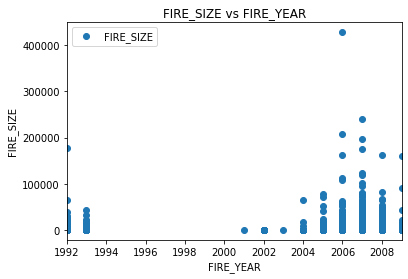

In [0]:
df1.plot(x='FIRE_YEAR',y='FIRE_SIZE',style = 'o')
plt.title('FIRE_SIZE vs FIRE_YEAR')
plt.xlabel('FIRE_YEAR')
plt.ylabel('FIRE_SIZE')
plt.show()

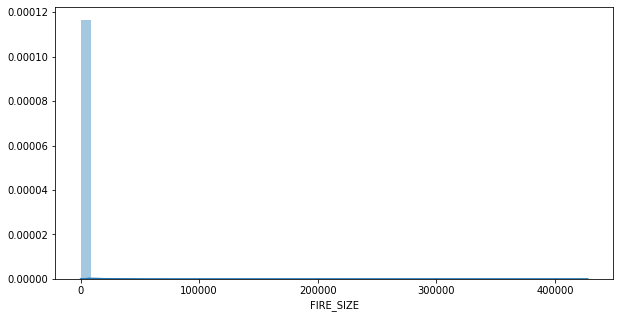

In [0]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(df1['FIRE_SIZE'])

In [0]:
X = df1[['FIRE_YEAR','LATITUDE','LONGITUDE','STAT_CAUSE_CODE','DISCOVERY_DOY']].values.reshape(-1,5)

In [0]:
Y = df1[['FIRE_SIZE']].values.reshape(-1,1)

In [0]:
X.shape

(58654, 5)

In [0]:
Y.shape

(58654, 1)

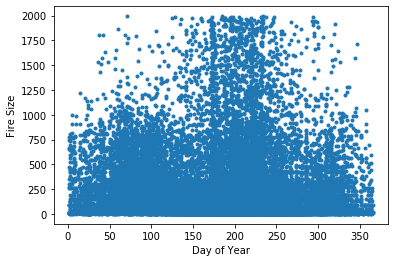

In [0]:
plt.scatter(X[:,4],Y,marker='.')

plt.ylabel("Fire Size")
plt.xlabel("Day of Year")

plt.show()

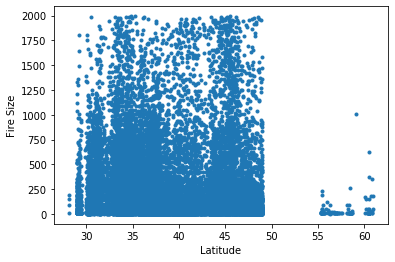

In [0]:
plt.scatter(X[:,1],Y,marker='.')

plt.ylabel("Fire Size")
plt.xlabel("Latitude")

plt.show()

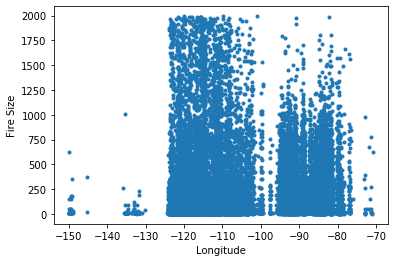

In [0]:
plt.scatter(X[:,2],Y,marker='.')

plt.ylabel("Fire Size")
plt.xlabel("Longitude")

plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [0]:
regressor = LinearRegression().fit(X_train,Y_train)

TESTING on All Features

In [0]:
regressor.coef_

array([ 2.41531257, -2.25131311,  3.63086875,  2.35361206, -0.17839948])

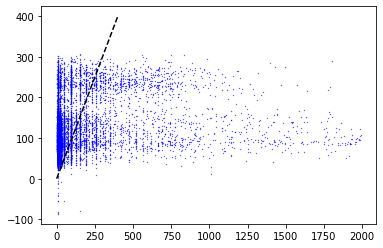

In [0]:
pred = regressor.predict(X_test)
plt.scatter(Y_test,pred,s=0.3,marker='.',c='b')
plt.plot([.1,20,400],[.1,20,400],c='k',linestyle='--')

TESTING on Discovery DOY

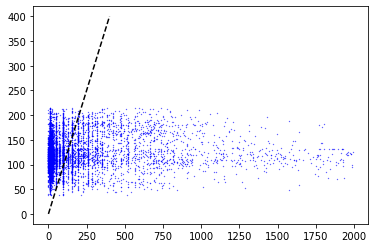

In [0]:
regressor = LinearRegression().fit(X_train[:,4:],Y_train)
pred = regressor.predict(X_test[:,4:])
plt.scatter(Y_test,pred,s=0.3,marker='.',c='b')
plt.plot([.1,20,400],[.1,20,400],c='k',linestyle='--')

Adding temperate data to the dataset


In [0]:
files = [str(x)+'.csv.gz' for x in range(2010,2016)]
files

['2010.csv.gz',
 '2011.csv.gz',
 '2012.csv.gz',
 '2013.csv.gz',
 '2014.csv.gz',
 '2015.csv.gz']

In [0]:
#fetching data from ftp server for years from 2010 to 2015

In [0]:
from ftplib import FTP
from datetime import datetime

start = datetime.now()
ftp = FTP('ftp.ncdc.noaa.gov')
ftp.login()
ftp.cwd("pub/data/ghcn/daily/by_year/")


# Get All Files
files = [str(x)+'.csv.gz' for x in range(2010,2016)]

# Print out the files
for file in files:
	print("Downloading..." + file)
	ftp.retrbinary("RETR " + file ,open(file, 'wb').write)

ftp.close()

end = datetime.now()
diff = end - start
print('All files downloaded for ' + str(diff.seconds) + 's')

Downloading...2010.csv.gz
Downloading...2011.csv.gz
Downloading...2012.csv.gz
Downloading...2013.csv.gz
Downloading...2014.csv.gz
Downloading...2015.csv.gz
All files downloaded for 152s


PYspark instance/
/


In [0]:

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
!pip install pyspark
import pyspark
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark import SparkFiles
import pyspark.sql.functions as func

     |████████████████████████████████| 217.8MB 77kB/s 
     |████████████████████████████████| 204kB 58.9MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=39f5cad127462a082d9cd3998c6650b46ad19d990e38509d400d92ba0b7ca6f7
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("gfcj") \
        .getOrCreate()

In [0]:
sc =SparkContext.getOrCreate()

for file in files:
  sc.addFile(file)

In [0]:
sqlContext = SQLContext(sc)
sqlContext
# df = sqlContext.read.csv(SparkFiles.get(files), header=True, inferSchema= True)
# df.printSchema()

spark.read.format("csv").option("header", "true").load("*.csv.gz")
df=spark.read.option("header", "false").csv("*.csv.gz")

In [0]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)



In [0]:
df.show(5)

+-----------+--------+----+----+----+----+---+----+
|        _c0|     _c1| _c2| _c3| _c4| _c5|_c6| _c7|
+-----------+--------+----+----+----+----+---+----+
|CA002303986|20100101|TMAX| 205|null|   G|  C|null|
|CA002303986|20100101|TMIN|-300|null|null|  C|null|
|CA002303986|20100101|PRCP|   4|null|null|  C|null|
|CA002303986|20100101|SNOW|   4|null|null|  C|null|
|CA002303986|20100101|SNWD|   0|null|   I|  C|null|
+-----------+--------+----+----+----+----+---+----+
only showing top 5 rows



In [0]:
sc.addFile('/content/ghcnd-stations.csv')

In [0]:
df2=spark.read.option("header", "true").csv('ghcnd-stations.csv')

In [0]:
df2

DataFrame[id: string, lat: string, long: string, _c3: string, _c4: string, _c5: string]

In [0]:
df.show(5)

+-----------+--------+----+----+----+----+---+----+
|        _c0|     _c1| _c2| _c3| _c4| _c5|_c6| _c7|
+-----------+--------+----+----+----+----+---+----+
|CA002303986|20100101|TMAX| 205|null|   G|  C|null|
|CA002303986|20100101|TMIN|-300|null|null|  C|null|
|CA002303986|20100101|PRCP|   4|null|null|  C|null|
|CA002303986|20100101|SNOW|   4|null|null|  C|null|
|CA002303986|20100101|SNWD|   0|null|   I|  C|null|
+-----------+--------+----+----+----+----+---+----+
only showing top 5 rows



In [0]:
df2.show(5)

+-----------+-------+--------+----+----+----+
|         id|    lat|    long| _c3| _c4| _c5|
+-----------+-------+--------+----+----+----+
|ACW00011604|17.1167|-61.7833|null|null|null|
|ACW00011647|17.1333|-61.7833|null|null|null|
|AE000041196| 25.333|  55.517|null|null|null|
|AEM00041194| 25.255|  55.364|null|null|null|
|AEM00041217| 24.433|  54.651|null|null|null|
+-----------+-------+--------+----+----+----+
only showing top 5 rows



In [0]:

data=df.selectExpr('_c0 as id','_c1 as date','_c2 as type','_c3 as value')

In [0]:
data.show()

+-----------+--------+----+-----+
|         id|    date|type|value|
+-----------+--------+----+-----+
|CA002303986|20100101|TMAX|  205|
|CA002303986|20100101|TMIN| -300|
|CA002303986|20100101|PRCP|    4|
|CA002303986|20100101|SNOW|    4|
|CA002303986|20100101|SNWD|    0|
|US1FLSL0019|20100101|PRCP|    0|
|ASN00037003|20100101|PRCP|    0|
|US1AZMR0019|20100101|PRCP|    0|
|US1AZMR0019|20100101|SNOW|    0|
|USC00178998|20100101|TMAX|    0|
|USC00178998|20100101|TMIN|  -56|
|USC00178998|20100101|TOBS|  -56|
|USC00178998|20100101|PRCP|   43|
|USC00178998|20100101|SNOW|   46|
|USC00178998|20100101|SNWD|  102|
|USC00242347|20100101|TMAX|   33|
|USC00242347|20100101|TMIN| -161|
|USC00242347|20100101|TOBS|   28|
|USC00242347|20100101|PRCP|    0|
|NOE00133566|20100101|TMAX|    2|
+-----------+--------+----+-----+
only showing top 20 rows



In [0]:
final_df = data.join(df2, on=['id'], how='inner')

In [0]:
final_df=final_df.selectExpr('id','lat as LATITUDE','long as LONGITUDE','date','type','value')

In [0]:
final_df.registerTempTable("temperature")

In [0]:
import requests
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1ApRYxyMqnFKH8XW1GbQ-KZNJdbdeEdV9'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Fire.csv')

1ApRYxyMqnFKH8XW1GbQ-KZNJdbdeEdV9


In [0]:
fire=pd.read_csv('Fire.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df=fire

df['disc_clean_date'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
#Convert containment date from julian to standard date
df['cont_clean_date'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
#Day of month string
df['discovery_month'] = df['disc_clean_date'].dt.strftime('%b')
#Returns the weekday string
df['discovery_weekday'] = df['disc_clean_date'].dt.strftime('%a')
#Merge discovery date and time

In [0]:
fire_filter=[2010]
df_2010=df[df.FIRE_YEAR.isin(fire_filter)]

fire_filter

[2010]

In [0]:
df_2010=df_2010[['LATITUDE','LONGITUDE','cont_clean_date']]

In [0]:
df_2010=df_2010.round()

In [0]:
df_2010=df_2010.dropna()

In [0]:
df_2010

,LATITUDE,LONGITUDE,cont_clean_date
1145148,62.0,-145.0,2010-08-25
1145149,61.0,-150.0,2010-06-04
1145150,63.0,-141.0,2010-06-10
1145151,65.0,-148.0,2010-04-24
1145152,65.0,-148.0,2010-04-25
...,...,...,...
1880370,42.0,-121.0,2010-07-27
1880390,38.0,-121.0,2010-06-11
1880393,42.0,-121.0,2010-08-04
1880417,38.0,-120.0,2010-09-15


In [0]:
df_2010['cont_clean_date']=df_2010['cont_clean_date'].astype(str)

In [0]:
df_2010['date']=df_2010['cont_clean_date'].replace('-', '', regex=True).astype(int)

In [0]:
df_2010

,LATITUDE,LONGITUDE,cont_clean_date,date
1145148,62.0,-145.0,2010-08-25,20100825
1145149,61.0,-150.0,2010-06-04,20100604
1145150,63.0,-141.0,2010-06-10,20100610
1145151,65.0,-148.0,2010-04-24,20100424
1145152,65.0,-148.0,2010-04-25,20100425
...,...,...,...,...
1880370,42.0,-121.0,2010-07-27,20100727
1880390,38.0,-121.0,2010-06-11,20100611
1880393,42.0,-121.0,2010-08-04,20100804
1880417,38.0,-120.0,2010-09-15,20100915


In [0]:
df_2010=df_2010[['LATITUDE','LONGITUDE','date']]

In [1]:
df_2010.to_csv(r'fire_2010.csv')

NameError: ignored

In [0]:
sc.addFile('fire_2010.csv')

In [0]:
fire=spark.read.option("header", "true").csv('fire_2010.csv')

In [0]:
fire.show(5)

+-------+--------+---------+--------+
|    _c0|LATITUDE|LONGITUDE|    date|
+-------+--------+---------+--------+
|1145148|    62.0|   -145.0|20100825|
|1145149|    61.0|   -150.0|20100604|
|1145150|    63.0|   -141.0|20100610|
|1145151|    65.0|   -148.0|20100424|
|1145152|    65.0|   -148.0|20100425|
+-------+--------+---------+--------+
only showing top 5 rows



In [0]:
final_df.show()

+-----------+--------+---------+--------+----+-----+
|         id|LATITUDE|LONGITUDE|    date|type|value|
+-----------+--------+---------+--------+----+-----+
|CA002303986| 62.2333|    -92.6|20100101|TMAX|  205|
|CA002303986| 62.2333|    -92.6|20100101|TMIN| -300|
|CA002303986| 62.2333|    -92.6|20100101|PRCP|    4|
|CA002303986| 62.2333|    -92.6|20100101|SNOW|    4|
|CA002303986| 62.2333|    -92.6|20100101|SNWD|    0|
|US1FLSL0019| 27.3237| -80.3111|20100101|PRCP|    0|
|ASN00037003|-20.4661| 138.4683|20100101|PRCP|    0|
|US1AZMR0019| 33.5902|-111.9712|20100101|PRCP|    0|
|US1AZMR0019| 33.5902|-111.9712|20100101|SNOW|    0|
|USC00178998| 44.6917| -68.3475|20100101|TMAX|    0|
|USC00178998| 44.6917| -68.3475|20100101|TMIN|  -56|
|USC00178998| 44.6917| -68.3475|20100101|TOBS|  -56|
|USC00178998| 44.6917| -68.3475|20100101|PRCP|   43|
|USC00178998| 44.6917| -68.3475|20100101|SNOW|   46|
|USC00178998| 44.6917| -68.3475|20100101|SNWD|  102|
|USC00242347| 47.3181|-109.9372|20100101|TMAX|

In [0]:

final_df=final_df.withColumn("LATITUDE", func.round(final_df["LATITUDE"]))
final_df=final_df.withColumn("LONGITUDE", func.round(final_df["LONGITUDE"]))

In [0]:
final_df.show()

+-----------+--------+---------+--------+----+-----+
|         id|LATITUDE|LONGITUDE|    date|type|value|
+-----------+--------+---------+--------+----+-----+
|CA002303986|    62.0|    -93.0|20100101|TMAX|  205|
|CA002303986|    62.0|    -93.0|20100101|TMIN| -300|
|CA002303986|    62.0|    -93.0|20100101|PRCP|    4|
|CA002303986|    62.0|    -93.0|20100101|SNOW|    4|
|CA002303986|    62.0|    -93.0|20100101|SNWD|    0|
|US1FLSL0019|    27.0|    -80.0|20100101|PRCP|    0|
|ASN00037003|   -20.0|    138.0|20100101|PRCP|    0|
|US1AZMR0019|    34.0|   -112.0|20100101|PRCP|    0|
|US1AZMR0019|    34.0|   -112.0|20100101|SNOW|    0|
|USC00178998|    45.0|    -68.0|20100101|TMAX|    0|
|USC00178998|    45.0|    -68.0|20100101|TMIN|  -56|
|USC00178998|    45.0|    -68.0|20100101|TOBS|  -56|
|USC00178998|    45.0|    -68.0|20100101|PRCP|   43|
|USC00178998|    45.0|    -68.0|20100101|SNOW|   46|
|USC00178998|    45.0|    -68.0|20100101|SNWD|  102|
|USC00242347|    47.0|   -110.0|20100101|TMAX|

In [0]:
complete = fire.join(final_df, on=['LATITUDE','LONGITUDE','date'], how='inner')

In [0]:
complete.show(5)

+--------+---------+--------+-------+-----------+----+-----+
|LATITUDE|LONGITUDE|    date|    _c0|         id|type|value|
+--------+---------+--------+-------+-----------+----+-----+
|    34.0|   -117.0|20100101|1176703|USC00045860|TMAX|  122|
|    34.0|   -117.0|20100101|1176703|USC00045860|TMIN|   33|
|    34.0|   -117.0|20100101|1176703|USC00045860|TOBS|   39|
|    34.0|   -117.0|20100101|1176703|USC00045860|PRCP|    0|
|    34.0|   -117.0|20100101|1176703|USC00045860|SNOW|    0|
+--------+---------+--------+-------+-----------+----+-----+
only showing top 5 rows



In [0]:
complete.count

<bound method DataFrame.count of DataFrame[LATITUDE: string, LONGITUDE: string, date: string, _c0: string, id: string, type: string, value: string]>

In [0]:
pandas_df = complete.toPandas()

KeyboardInterrupt: ignored